In [3]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np 
import matplotlib.image as mpimg

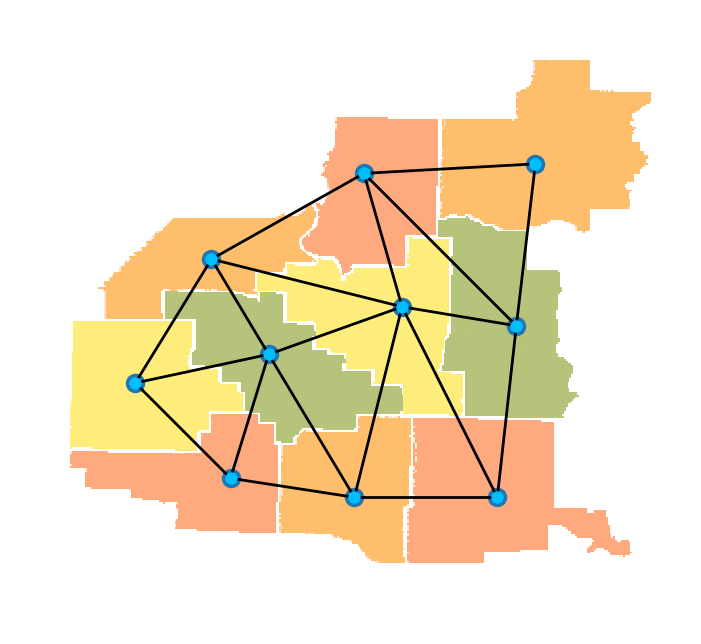

In [29]:
plt.figure(dpi=200)
img = mpimg.imread('Map.png')
imgplot = plt.imshow(img)

nodes_loc = np.array([(110,240),
                      (60,190),
                     (175,250),
                     (130,175),
                     (100,125),
                     (200,150),
                     (250,250),
                     (260,160),
                     (180,80),
                     (270,75)])

plt.scatter(nodes_loc[:,0],nodes_loc[:,1])
# for i in range(len(nodes_loc)):
#     plt.text(nodes_loc[i,0],nodes_loc[i,1],s=i)
    
G = nx.Graph()
G.add_edges_from([(0,1),
                 (0,2),
                 (0,3),
                 (1,3),
                 (1,4),
                 (2,3),
                 (2,5),
                 (2,6),
                 (3,4),
                 (3,5),
                 (4,5),
                 (4,8),
                 (5,6),
                 (5,7),
                 (5,8),
                 (6,7),
                 (7,8),
                 (7,9),
                 (8,9)])

# nx.draw(G,pos = nodes_loc,node_color='lightblue',labels={i:i for i in range(len(nodes_loc))})
    

nx.draw(G,pos = nodes_loc,node_color='deepskyblue',node_size=12)
    
plt.savefig('network.png')
plt.show()